In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

In [2]:
# Load the dataset
df = pd.read_csv('GOOGL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


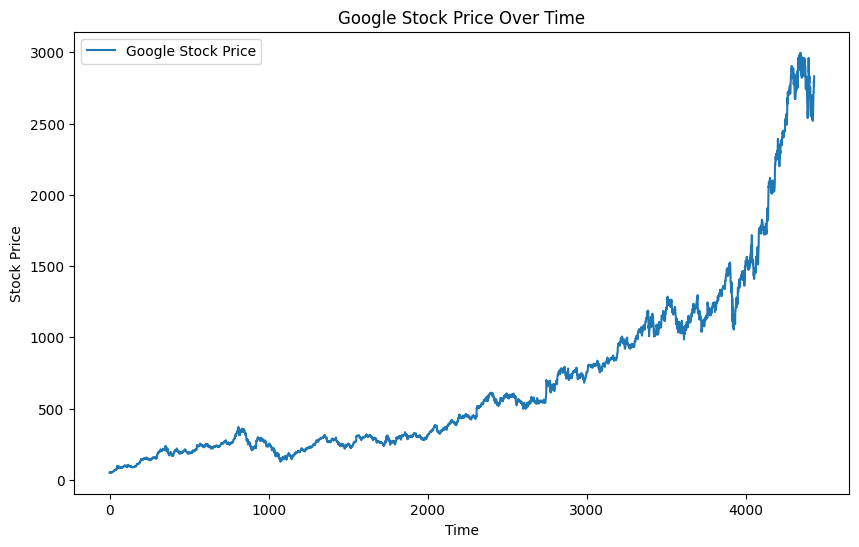

In [20]:
# Visualize the dataset
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Google Stock Price Over Time')
plt.legend()
plt.show()

In [4]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close_scaled'] = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [5]:
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

In [6]:
time_steps = 30  # Number of time steps to look back
X, y = create_dataset(df['Close_scaled'].values, time_steps)

In [7]:
# Split the dataset into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [8]:
# Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50),
    Dense(units=1)
])

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Measure training time
start_time = time.time()

In [12]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
88/88 [==============================] - 6s 33ms/step - loss: 5.4563e-04 - val_loss: 1.2404e-04
Epoch 2/10
88/88 [==============================] - 3s 31ms/step - loss: 2.7796e-05 - val_loss: 2.2292e-04
Epoch 3/10
88/88 [==============================] - 2s 23ms/step - loss: 2.6319e-05 - val_loss: 2.4004e-04
Epoch 4/10
88/88 [==============================] - 2s 23ms/step - loss: 2.5506e-05 - val_loss: 1.2145e-04
Epoch 5/10
88/88 [==============================] - 2s 22ms/step - loss: 2.5721e-05 - val_loss: 1.6043e-04
Epoch 6/10
88/88 [==============================] - 2s 22ms/step - loss: 2.4627e-05 - val_loss: 8.3829e-05
Epoch 7/10
88/88 [==============================] - 2s 26ms/step - loss: 2.1805e-05 - val_loss: 2.1460e-04
Epoch 8/10
88/88 [==============================] - 3s 29ms/step - loss: 2.1422e-05 - val_loss: 1.8080e-04
Epoch 9/10
88/88 [==============================] - 2s 22ms/step - loss: 2.1493e-05 - val_loss: 1.6460e-04
Epoch 10/10
88/88 [==================

In [13]:
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

Training Time: 57.675634145736694 seconds


In [14]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

28/28 [==============================] - 1s 8ms/step - loss: 6.8005e-04
Test Loss: 0.000680052035022527


In [15]:
# Measure prediction time
start_time = time.time()

In [16]:
# Make predictions
predictions = model.predict(X_test)

28/28 [==============================] - 1s 8ms/step


In [17]:
prediction_time = time.time() - start_time
print("Prediction Time:", prediction_time, "seconds")

Prediction Time: 22.51384472846985 seconds


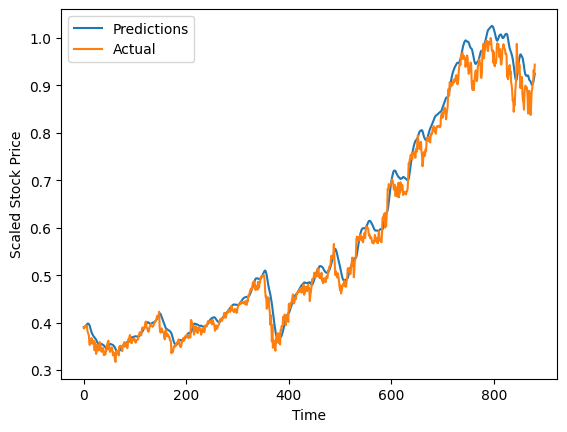

In [18]:
# Plot predictions vs actual
plt.plot(predictions, label='Predictions')
plt.plot(y_test, label='Actual')
plt.xlabel('Time')
plt.ylabel('Scaled Stock Price')
plt.legend()
plt.show()

We load the Google stock prices dataset and preprocess it by scaling the 'Close' prices between 0 and 1.
We create sequences of input-output pairs for training the RNN model.
We split the dataset into training and testing sets.
We define an RNN model using LSTM layers.
We compile the model with mean squared error loss and the Adam optimizer.
We train the model on the training data.
We evaluate the model on the testing data and print the test loss.
We make predictions using the trained model and plot them against the actual stock prices.